In [177]:
import pathlib
import IPython.display as display
import scipy.io as sio 
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 
import random
import os
import glob
from itertools import product

# Load CSV

In [122]:
df = pd.read_csv("train_relationships.csv")

# Split Train X,y

In [207]:
parents_path =[("./train/"+row)for row in df["p1"]]
childs_path =[("./train/"+row)for row in df["p2"]]

In [243]:
df.iloc[121:133]

,p1,p2
121,F0038/MID1,F0038/MID4
122,F0038/MID1,F0038/MID6
123,F0038/MID2,F0038/MID4
124,F0038/MID3,F0038/MID6
125,F0038/MID3,F0038/MID5
126,F0038/MID5,F0038/MID6
127,F0039/MID1,F0039/MID4
128,F0039/MID1,F0039/MID3
129,F0040/MID1,F0040/MID3
130,F0041/MID1,F0041/MID6


# Product n of Parent * child

In [256]:
dataset_path=[]
trainX=[]
trainY=[]
#np.random.shuffle(X)
for  x,y  in zip(parents_path,childs_path):
    parents = [ ".\\"+str(filename) for filename  in pathlib.Path(x).glob('*.jpg')]
    childs = [ ".\\"+str(filename) for filename  in pathlib.Path(y).glob('*.jpg')]
    family = list(product(parents,childs))
    if len(parents)==0 or len(childs)==0:
        print("NOT FOUND parent {0} child {1}   {2} and {3}".format(len(parents),len(childs),str(x),str(y)))
        continue
        # data set link broken
    parent , child = zip(*family)
    
    #print("\n")
    trainX.extend(parent)
    trainY.extend(child)
print(len(trainX), len(trainY))

NOT FOUND parent 4 child 0   ./train/F0039/MID1 and ./train/F0039/MID3
NOT FOUND parent 13 child 0   ./train/F0041/MID1 and ./train/F0041/MID7
NOT FOUND parent 0 child 2   ./train/F0041/MID3 and ./train/F0041/MID4
NOT FOUND parent 0 child 0   ./train/F0041/MID5 and ./train/F0041/MID7
NOT FOUND parent 0 child 5   ./train/F0051/MID5 and ./train/F0051/MID1
NOT FOUND parent 0 child 1   ./train/F0051/MID5 and ./train/F0051/MID3
NOT FOUND parent 0 child 4   ./train/F0051/MID5 and ./train/F0051/MID4
NOT FOUND parent 0 child 6   ./train/F0058/MID2 and ./train/F0058/MID4
NOT FOUND parent 0 child 1   ./train/F0058/MID2 and ./train/F0058/MID5
NOT FOUND parent 0 child 14   ./train/F0058/MID2 and ./train/F0058/MID1
NOT FOUND parent 8 child 0   ./train/F0070/MID1 and ./train/F0070/MID3
NOT FOUND parent 8 child 0   ./train/F0070/MID2 and ./train/F0070/MID3
NOT FOUND parent 0 child 2   ./train/F0070/MID3 and ./train/F0070/MID4
NOT FOUND parent 0 child 3   ./train/F0070/MID3 and ./train/F0070/MID5
NOT 

NOT FOUND parent 14 child 0   ./train/F0460/MID5 and ./train/F0460/MID8
NOT FOUND parent 4 child 0   ./train/F0460/MID6 and ./train/F0460/MID8
NOT FOUND parent 6 child 0   ./train/F0460/MID7 and ./train/F0460/MID8
NOT FOUND parent 0 child 7   ./train/F0460/MID8 and ./train/F0460/MID1
NOT FOUND parent 5 child 0   ./train/F0482/MID1 and ./train/F0482/MID4
NOT FOUND parent 1 child 0   ./train/F0482/MID3 and ./train/F0482/MID4
NOT FOUND parent 7 child 0   ./train/F0489/MID2 and ./train/F0489/MID3
NOT FOUND parent 1 child 0   ./train/F0489/MID4 and ./train/F0489/MID3
NOT FOUND parent 15 child 0   ./train/F0498/MID1 and ./train/F0498/MID3
NOT FOUND parent 0 child 2   ./train/F0498/MID3 and ./train/F0498/MID4
NOT FOUND parent 0 child 15   ./train/F0498/MID5 and ./train/F0498/MID1
NOT FOUND parent 0 child 0   ./train/F0498/MID5 and ./train/F0498/MID3
NOT FOUND parent 0 child 2   ./train/F0498/MID5 and ./train/F0498/MID4
NOT FOUND parent 2 child 0   ./train/F0498/MID6 and ./train/F0498/MID3
NOT

# Shuffle Dataset

In [267]:
temp = list(zip(trainX, trainY))
print([i for i in temp[30]])
np.random.shuffle(temp)
print([i for i in temp[30]])
trainX,trainY =zip(*temp)


['.\\train\\F0002\\MID1\\P00012_face2.jpg', '.\\train\\F0002\\MID3\\P00017_face1.jpg']
['.\\train\\F0601\\MID19\\P11988_face2.jpg', '.\\train\\F0601\\MID6\\P06312_face1.jpg']


In [162]:
for col in df["p1"]:
 
    parent = [ str(filename) for filename  in pathlib.Path("./train/"+col).glob('*.jpg')]
    print(parent)
    print("\n\n\n")
    for c in df["p2"]:
        child = [ str(filename) for filename  in pathlib.Path("./train/"+c).glob('*.jpg')]
        print(child)
        break
    print("\n\ndddddd\n")

[]




['train\\F0002\\MID3\\P00009_face1.jpg', 'train\\F0002\\MID3\\P00010_face1.jpg', 'train\\F0002\\MID3\\P00011_face3.jpg', 'train\\F0002\\MID3\\P00013_face3.jpg', 'train\\F0002\\MID3\\P00014_face1.jpg', 'train\\F0002\\MID3\\P00015_face1.jpg', 'train\\F0002\\MID3\\P00017_face1.jpg', 'train\\F0002\\MID3\\P00018_face2.jpg']


dddddd

[]




['train\\F0002\\MID3\\P00009_face1.jpg', 'train\\F0002\\MID3\\P00010_face1.jpg', 'train\\F0002\\MID3\\P00011_face3.jpg', 'train\\F0002\\MID3\\P00013_face3.jpg', 'train\\F0002\\MID3\\P00014_face1.jpg', 'train\\F0002\\MID3\\P00015_face1.jpg', 'train\\F0002\\MID3\\P00017_face1.jpg', 'train\\F0002\\MID3\\P00018_face2.jpg']


dddddd



# Random Sample

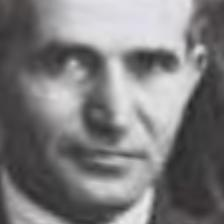

train\F0070\MID1\P00709_face3.jpg


In [94]:
for n in range(1):
  image_path = random.choice(trainX)
  img_parent = [ str(filename) for filename  in pathlib.Path(image_path).glob('*.jpg')][0]
  display.display(display.Image(img_parent ))
  print(img_parent)


In [92]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize_images(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image
def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

In [113]:
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'1.9.0'

In [110]:
image_paths_ds = tf.data.Dataset.from_tensor_slices(trainX)
label_paths_ds = tf.data.Dataset.from_tensor_slices(trainY)
image_ds = image_paths_ds.map(load_and_preprocess_image, num_parallel_calls=5)
label_ds = label_paths_ds.map(load_and_preprocess_image, num_parallel_calls=5)

In [111]:
train_data = tf.data.Dataset.from_tensor_slices(
  (trainX, trainY)
)

In [118]:
model = tf.keras.Sequential([
# Adds a densely-connected layer with 64 units to the model:
layers.Dense(64, activation='relu', input_shape=(192,192)),
# Add another:
layers.Dense(64, activation='relu'),
# Add a softmax layer with 10 output units:
layers.Dense(1, activation='sigmoid')])

model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])